In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from category_encoders import MEstimateEncoder

In [4]:
import warnings
warnings.simplefilter(action='ignore')

In [5]:
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
data.columns.array

<PandasArray>
[            'age',       'workclass',          'fnlwgt',       'education',
 'educational-num',  'marital-status',      'occupation',    'relationship',
            'race',          'gender',    'capital-gain',    'capital-loss',
  'hours-per-week',  'native-country',          'income']
Length: 15, dtype: object

In [7]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [8]:
for col in data.columns:
    print(col)
    print(data[col].value_counts(), "\n")

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64 

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
82649      1
193304     1
227689     1
135891     1
250034     1
Name: fnlwgt, Length: 28523, dtype: int64 

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name:

In [9]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
cat_cols = data.select_dtypes('object')
num_cols = data.select_dtypes(['int64'])

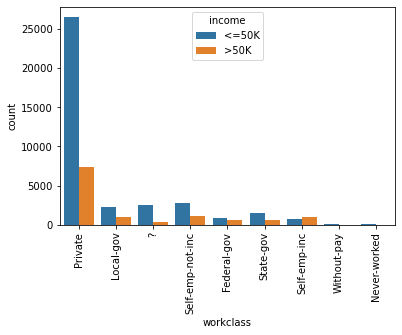

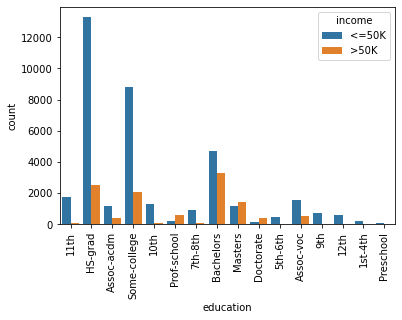

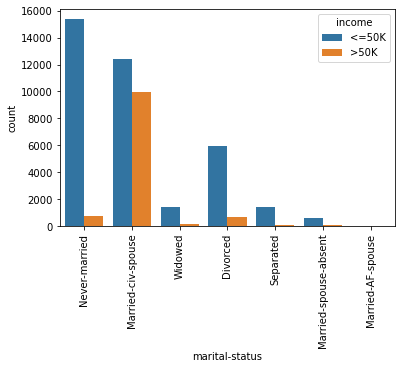

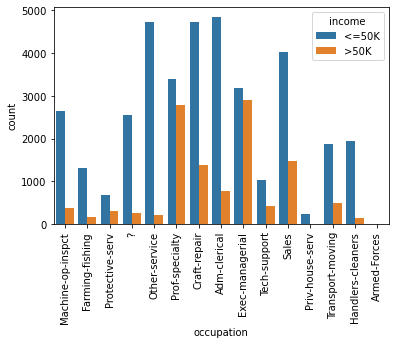

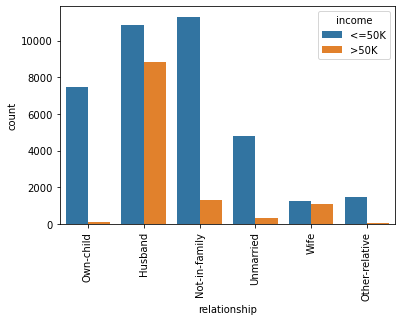

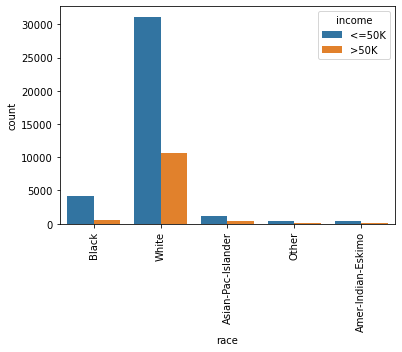

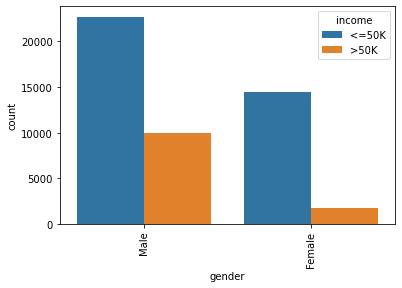

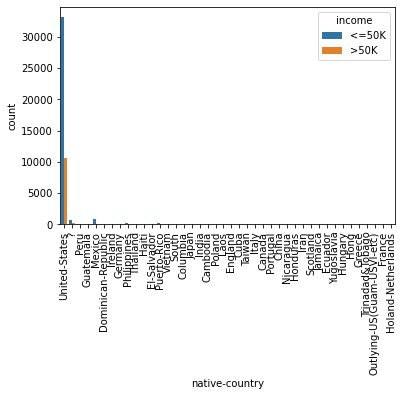

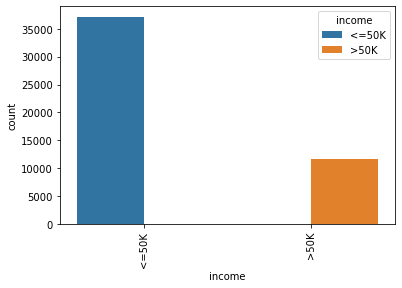

In [11]:
for col in cat_cols:
    sns.countplot(data[col], hue=data["income"])
    plt.xticks(rotation=90)
    plt.show()

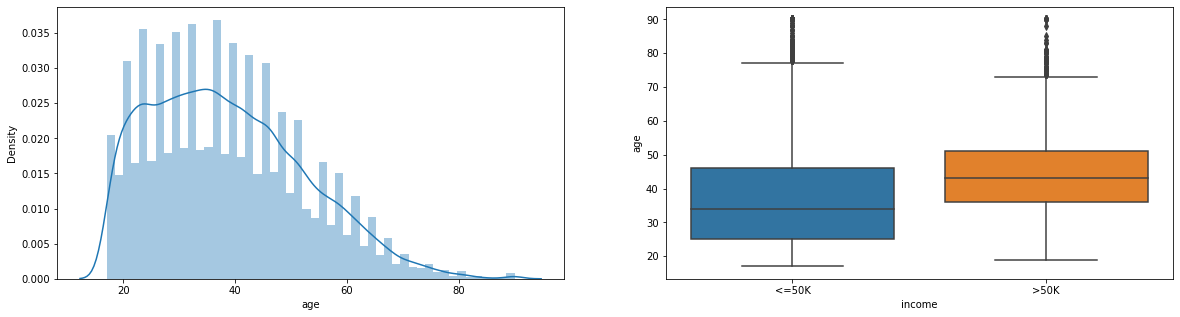

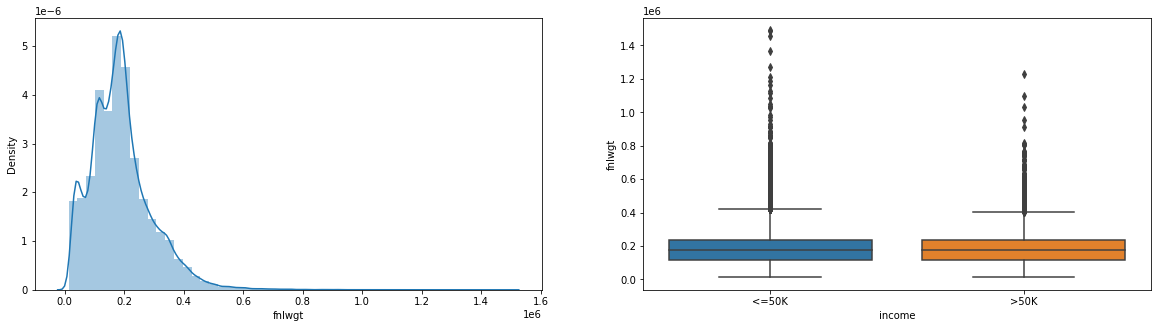

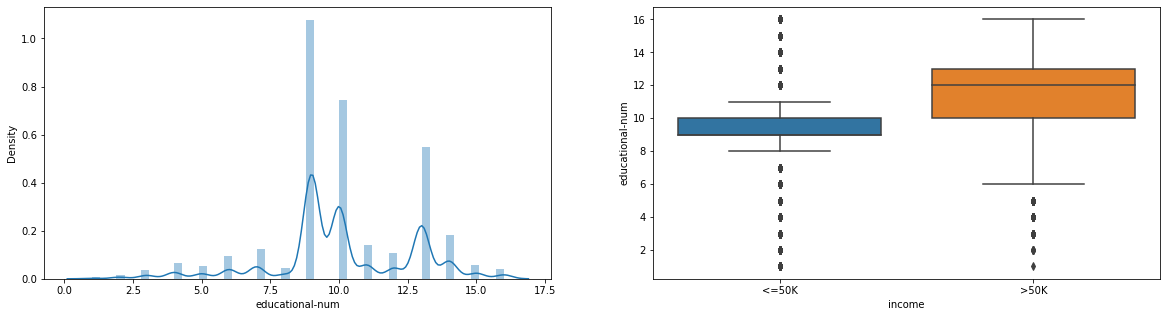

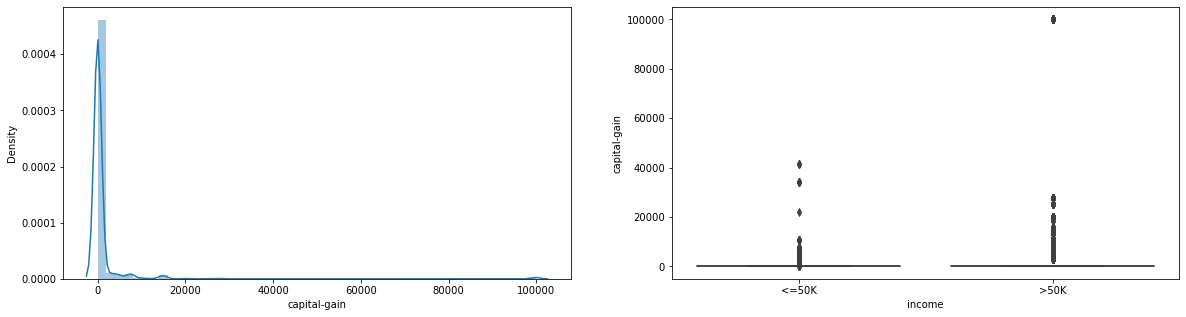

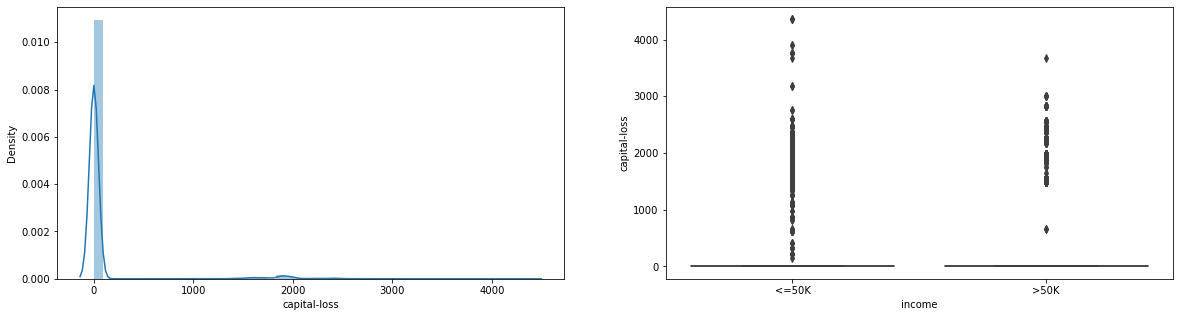

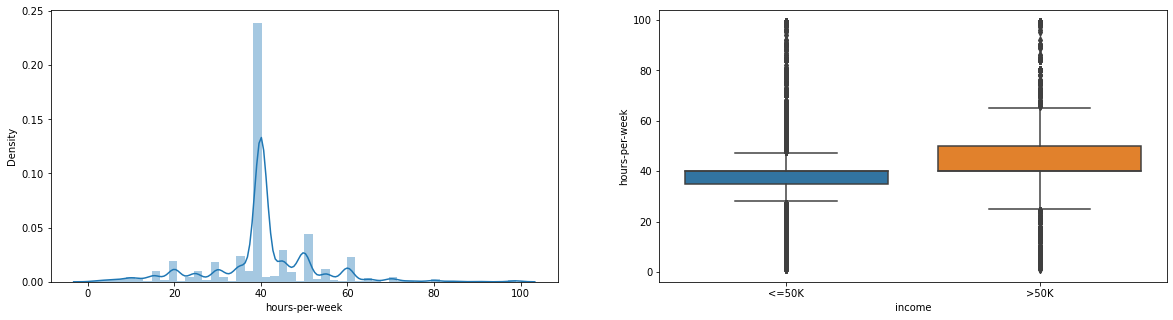

In [12]:
for col in num_cols:
    f, axis = plt.subplots(1,2, figsize=(20, 5))
    sns.distplot(data[col], ax=axis[0], kde=True)
    sns.boxplot(data['income'], data[col], ax=axis[1])
    plt.show()

In [13]:
for i,v in enumerate(data.columns.to_list()):
    data[v].replace("?", np.NaN, inplace=True)

In [14]:
data["workclass"].replace(np.NaN, "Private", inplace=True)
data["occupation"].replace(np.NaN, "Missing", inplace=True)
data["native-country"].replace(np.NaN, "United-States", inplace=True)

In [15]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
for j, x in enumerate(data.select_dtypes(exclude=['float64','int64']).columns.to_list()): 
    my_dict = { v : i 
                   for i, v in enumerate(data[x].unique(), 0)
              }
    data.loc[:, x] = data.loc[:, x].map(my_dict)

In [17]:
df_train, df_test = train_test_split(data, test_size=0.2, stratify = data['income'])

In [18]:
X_train = df_train.drop(columns=['income'], axis=1)
X_test = df_test.drop(columns=['income'], axis=1)

y_train = pd.get_dummies(df_train['income'], drop_first=True)
y_test = pd.get_dummies(df_test['income'], drop_first=True)

In [19]:
for col in X_train.columns:
    print(col)
    print(X_train[col].value_counts(), "\n")

age
36    1081
35    1059
37    1043
31    1042
23    1041
      ... 
85       5
88       4
87       3
86       1
89       1
Name: age, Length: 74, dtype: int64 

workclass
0    29401
2     3097
1     2467
4     1609
5     1350
3     1128
6       14
7        7
Name: workclass, dtype: int64 

fnlwgt
203488    19
125892    16
120277    15
127651    15
99185     15
          ..
231004     1
110169     1
185942     1
183893     1
38472      1
Name: fnlwgt, Length: 24649, dtype: int64 

education
1     12590
3      8689
7      6422
8      2171
11     1650
0      1465
2      1276
4      1116
6       768
5       652
12      603
13      536
9       467
10      402
14      202
15       64
Name: education, dtype: int64 

educational-num
9     12590
10     8689
13     6422
14     2171
11     1650
7      1465
12     1276
6      1116
4       768
15      652
5       603
8       536
16      467
3       402
2       202
1        64
Name: educational-num, dtype: int64 

marital-status
1    17950
0    12

In [20]:
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=0)

In [21]:
print(classification_report(y_test, rf.predict(X_test)))
print('Train score : ', f1_score(y_train, rf.predict(X_train)))
print('test score : ', f1_score(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7431
           1       0.76      0.62      0.68      2338

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769

Train score :  0.9998930481283422
test score :  0.6814430558830464


In [22]:
gb = GradientBoostingClassifier(n_estimators=300, max_depth=5,random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=0)

In [23]:
print(classification_report(y_test, gb.predict(X_test)))
print('Train score : ', f1_score(y_train, gb.predict(X_train)))
print('test score : ', f1_score(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7431
           1       0.80      0.66      0.72      2338

    accuracy                           0.88      9769
   macro avg       0.85      0.80      0.82      9769
weighted avg       0.88      0.88      0.87      9769

Train score :  0.7660584998551985
test score :  0.7226140103432065


In [24]:
adbc = AdaBoostClassifier(n_estimators=500, random_state=0)
adbc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=500, random_state=0)

In [25]:
print(classification_report(y_test, adbc.predict(X_test)))
print('Train score : ', f1_score(y_train, adbc.predict(X_train)))
print('test score : ', f1_score(y_test, adbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7431
           1       0.80      0.64      0.71      2338

    accuracy                           0.88      9769
   macro avg       0.85      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769

Train score :  0.7034490863152947
test score :  0.7136752136752137
